<img src="img/title.gif" alt="Drawing" style="width: 1500px; height: 600px"/>

# <b>Introduction</b>
***

This notebooks purpose is to give a gentle introduction to the concept of quantum computing, how it differs from regular computing and examples of Deutsch's Algorithm using Qiskit.

In accordance with [GMIT's plagarism policy](https://www.gmit.ie/sites/default/files/public/general/docs/policy-plagiarism-2019.pdf), all work compiled in this notebook is owned by the author and the creators of the respective algorithms. All sources and aids used have been indicated as such. All texts either quoted directly or paraphrased have been indicated by in-text citations.



# <b>What is quantum computing?</b> 
***

## Why do we need quantum computing?


Since the early 60's, humans have steadily created computers that contain smaller and smaller components. These computer components are reaching sizes comparable to atoms meaning that we are approaching a physical limit to how small we can make them. 

Computer chips contain modules, which contain logic gates, which contain transistors. Transistors are the simpliest form of a data processor in computing. 
These transistors act as switches that can either block or open the way for information to pass through.
This information is made up of bits which can either be set to 0 or 1. Combinations of multiple bits can be used to represent more complex information. 


Put simply, a transistor is an electric switch. Electricity is just electrons moving from one place to another, where a transistor can block the flow of electrons in one direction. With parts getting increasingly smaller, the average size of a transistor being 14 nanometers, quantum physics begin to make the passage of electrons more complicated. Through a process named "Quantum Tunnelling", electrons may just transfer themselves to the other side of the block the transistor provides.

<img src="img/quantum-tunnelling.gif" alt="quantum tunnelling" style="width: 600px; height: 300px"/><br>
<sub>Gif representation of quantum tunnelling</sub>
<br>
<sub><sup>Image courtesy of: https://www.youtube.com/watch?v=JhHMJCUmq28&t=152s </sup></sub>


Utilising these strange properties of quantum physics led to the development of the quantum computer. 

## What's a quantum computer?

A quantum computer utilises quantum mechanics to produce processing power unlike what typical computers are capable of producing. While traditional computers use bits which can be set to either 0 or 1,  quantum computers use qubits, which are similar to electrons or photons as they are all subatomic particles. Qubits possess various properties that make them stand out from their binary counterpart, especially when there are a connected group of them. A group of qubits can provide way more processing power than the same number of binary bits.  

### Superposition
Qubits possess the unique ability to represent numerous possible combinations of 0 or 1 which is what seperates them from the traditional bit. This property of the qubit is called superposition. Qubits can be manipulated to be placed in their superposition state by using precision lasers or microwave beams.

Calculations can be solved exponentially faster with a quantum computer when several qubits in are put into superposition. The final result of a calculation emerges only once the qubits are measured, which immediately causes their state to collapse back into either a 0 or 1.

### Entanglement
Pairs of qubits can be "entangled". This means that two qubits thats are a pair can be put into a single quantum state. If the state of one of the qubits is changed, the other quibit will instantaneously change to the state of the opposite one. Distance does not affect the entanglement of two bits, so a pair of qubits will change even if the distance is vast. 


## <b>Comparisons of quantum computing and classical computing</b>
***

<img src="img/comparison.png" alt="comparison" style="width: 600px; height: 300px"/>

<sub><sup>Image courtesy of: https://www.youtube.com/watch?v=JhHMJCUmq28&t=152s </sup></sub>

We now know what quantum computing is and the demand for further development with quantum computers. We understand that a traditional computer utilises bits for transfering information and a quantum computer utilises qubits, but what are the differences between a quantum computer and a home desktop?

## Quantum computing includes the following properties:
    
<ul>
    <li> Is a high speed parallel computer that utilises quantum mechanics.
    <li> Utilises qubits for data transfer.
    <li> Qubits are in a superposition of either 0 or 1 and will only collapse into a state once measured.
    <li> Information processing is carried out with quantum logic gates.
    <li> Infinitely more useful in areas like database searching and simulating quantum mechanics.
</ul> 

## Classical computing includes the following properties:

<ul>
    <li> Is a large scale integrated multi-purpose computer that utilises a CPU. 
    <li> Utilises bits for data transfer.
    <li> Bits can only be a value of 0 or 1.
    <li> Information processing is carried out with logic gates e.g AND, NAND, OR, XOR. These gates only work in sequential order
    <li> Suitable for home use and internet browsing, vastly inferior in subjects like database searching and simulating quantum mechanics.
</ul>

***
# <b>Deutsch’s algorithm</b>
***

## Introduction

**David Deutsch** was born in Haifa, Israel. He studied physics at Cambridge and Oxford Universities and after several years at the University of Texas at Austin, he returned to Oxford, where he now lives and works. Since 1999, He has been a non-stipendiary Visiting Professor of Physics at the University of Oxford, where he is a founder member of the Centre for Quantum Computation at the Clarendon Laboratory. 

<img src="img/deutsch.png" alt="comparison" style="width: 600px; height: 400px"/><br>
<sub>David Deutsch</sub>
<br>
<sub><sup>Image courtesy of: https://nautil.us/blog/david-deutsch-explains-why-its-good-to-be-wrong </sup></sub>

## Deutsch-Jozsa algorithm

The Deutsch-Jozsa algorithm was the first to show a separation between the quantum and classical difficulty of a problem. This algorithm demonstrates the significance of allowing quantum amplitudes to take both positive and negative values, as opposed to classical probabilities that are always non-negative.

## The main problem

Quantum computers are way-slower than classical computers in mathematical calculations. But, there are a certain set of problems that are designed to leverage the superposition capability of qubits to get to the solution in a faster way.

Deutsch-Jozsa is one such algorithm proposed by David Deutsch and Richard Jozsa in 1992.

In the Deutsch–Jozsa problem, we are given a black box quantum computer implements some function that takes n-digit binary values as input and produces either a 0 or a 1 as output for each such value. We are promised that the function is either constant which displays 0 on all outputs or 1 on all outputs, or balanced which returns 1 for half of the input domain and 0 for the other half. The task then is to determine if the function is constant or balanced by using the black box quantum computer.

Below is a representation of balanced and constant functions in code using the Classical Algorithm.



***
### **Setup**

In [1]:
# Random selections.
import random

# Permutations and combinations.
import itertools

***

### **Generate balanced and constant functions and put them into a list**

In [2]:
# Number of input bits.
n = 2

In [3]:
# The zeros constant function.
[0] * 2**n

[0, 0, 0, 0]

In [4]:
# The ones constant function.
[1] * 2**n

[1, 1, 1, 1]

In [5]:
# Generate the balanced functions.
# Adapted from https://stackoverflow.com/a/43817007
def balanced_functions(noinputbits):
    # The length of the list is 2 to power of noinputbits.
    size = 2**noinputbits
    # The nubmer of ones is half the length of that list.
    count = size // 2
    # Generate all positions for 1's.
    for positions in itertools.combinations(range(size), count):
        # Create a list of zeros.
        p = [0] * size
        # Set positions to 1's.
        for i in positions:
            p[i] = 1
        # Generate the list.
        yield p

list(balanced_functions(2))

[[1, 1, 0, 0],
 [1, 0, 1, 0],
 [1, 0, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 0, 1],
 [0, 0, 1, 1]]

In [6]:
# Generate all the constant and balanced functions.
def generate_functions(n):
    return list(balanced_functions(n)) + [[0] * 2**n, [1] * 2**n]

In [7]:
# Generate all functions.
generate_functions(n)

[[1, 1, 0, 0],
 [1, 0, 1, 0],
 [1, 0, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 0, 1],
 [0, 0, 1, 1],
 [0, 0, 0, 0],
 [1, 1, 1, 1]]

In [8]:
def randomf(n):
    # Get all balanced and constant functions as lists.
    funcs = generate_functions(n)
    # Return a random function as a list.
    return random.choice(funcs)

In [9]:
# Call randomf for two input bits.
f = randomf(2)

In [10]:
# It's just a list for now.
f

[0, 1, 0, 1]

### **Get the functions and pick one at random with an inputted amount of bits**

In [11]:
# Let's make it a function.
def randomf(n):
    # Get all balanced and constant functions as lists.
    funcs = generate_functions(n)
    # Pick one at random.
    retvals = random.choice(funcs)
    # Create a function from the list.
    def f(*x):
        # Reverse the bits.
        x = x[::-1]
        # Running total for position in list for output bit.
        retpos = 0
        # Loop through the elements in x (reversed).
        for i in range(len(x)):
            # Multiply i pos of x by 2^i.
            retpos = retpos + (x[i] * 2**i)
        # List position.
        return retvals[retpos]
    # Function returns a function.
    return f

In [12]:
# Get a random function that takes two bits as input.
randomf(2)

<function __main__.randomf.<locals>.f(*x)>

In [13]:
# Get a random function that takes two bits as input.
f = randomf(2)

In [14]:
# Sample calls.
f(1, 1)

1

In [15]:
# Sample calls.
f(0, 1)

1

***

### **Classical Algorithm**

In [16]:
# Number of input bits.
n = 2

In [17]:
# Generate a random constant or balanced function
# with n in put bits.
f = randomf(n)

In [18]:
# Adapted from: https://stackoverflow.com/a/35313967
list(itertools.product(*[(0, 1)] * n))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [19]:
def balanced_or_constant(f, n):
    # Presume f is constant.
    constant = True
    # Last returned value.
    last = None
    # Keep track of number of iterations.
    i = 0
    # Loop through all possible inputs.
    for inputs in itertools.product(*[(0, 1)] * n):
        # Try this input on f.
        current = f(*inputs)
        # Print a debug message.
        print(f"Trying: {inputs}  Return: {current}  Last: {last}")
        # Compare last to current.
        if last is not None and current != last:
            # Tell the user f is balanced.
            constant = False
            break
        last = current
        # Increment the iteration count.
        i = i + 1
        # Have we performed 2**(n-1) + 1 iterations.
        if i > 2**(n-1):
            break
    if constant:
        print("Constant")
    else:
        print("Balanced")

In [20]:
balanced_or_constant(f, n)

Trying: (0, 0)  Return: 1  Last: None
Trying: (0, 1)  Return: 1  Last: 1
Trying: (1, 0)  Return: 0  Last: 1
Balanced


***
### **Inputting more than two bits**

In [21]:
# Four input bits.
n = 4

In [22]:
# Generate random function.
f = randomf(n)

In [23]:
# Test if balanced.
balanced_or_constant(f, n)

Trying: (0, 0, 0, 0)  Return: 1  Last: None
Trying: (0, 0, 0, 1)  Return: 0  Last: 1
Balanced


***

Using this algorithm, we can determine if a random function with an input of more than two bits is either constant or balanced. It takes 2n-1 +1 evaluations in the worst case for a classical computer to determine if the function is constant or balanced. Which is in exponential time complexity.

Now let’s see how a quantum computer solves this problem in polynomial time.

***

## **Qiskit application**
https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

### Setup
***

In [24]:
# Qiskit itself
import qiskit

In [25]:
# Aer simulator.
import qiskit.providers.aer as aer

In [26]:
# Diagrams.
import matplotlib.pyplot as plt

In [27]:
# Random numbers.
import random

In [28]:
# Change pyplot style.
plt.style.use('ggplot')

### **Constant Zero Function** using a Quantum Circuit
### $f(0) = 0, f(1) = 0$
***

In [29]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [30]:
# Apply a Hadamard gate to first qubit.
circuit.h(0)

In [31]:
# Apply a Hadamard gate to second qubit.
circuit.h(1)

In [32]:
# Identity gate.
circuit.i(1)

In [33]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [34]:
# Measure the first qubit.
circuit.measure(0, 0)

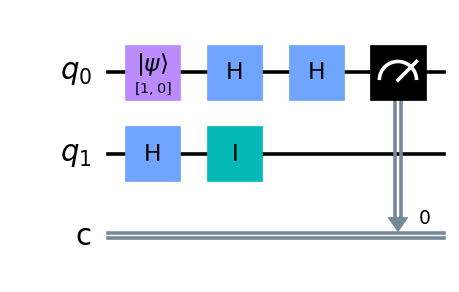

In [35]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [36]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

In [37]:
# Show the result counts.
counts = results.get_counts()
counts

{'0': 1000}

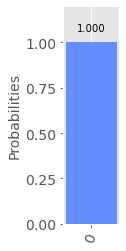

In [38]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

***
### **Constant One Function** using a Quantum Circuit
### $f(0) = 1, f(1) = 1$
***

In [39]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [40]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [41]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

In [42]:
# X gate.
circuit.x(1)

In [43]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

In [44]:
# Measure the first qubit.
circuit.measure(0, 0)

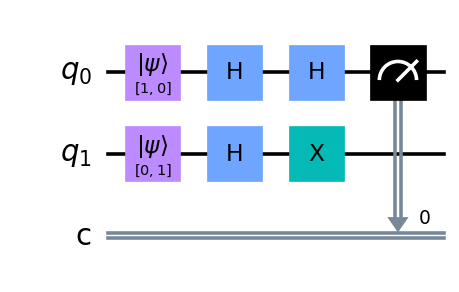

In [45]:
# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [46]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

# Show the result counts.
counts = results.get_counts()
counts


{'0': 1000}

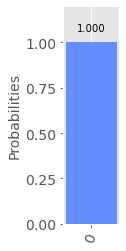

In [47]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

***
### **Balanced Zero-One Function** using a Quantum Circuit
### $f(0) = 0, f(1) = 1$
***

In [48]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [49]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [50]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

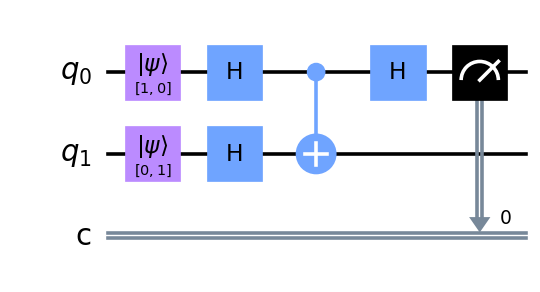

In [51]:
# CNOT gate.
circuit.cnot(0, 1)

# Apply another Hadamard gate to the first qubit.
circuit.h(0)

# Measure the first qubit.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [52]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

# Show the result counts.
counts = results.get_counts()
counts


{'1': 1000}

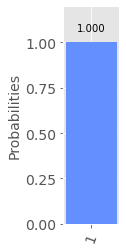

In [53]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

***
### **Balanced One-Zero Function** using a Quantum Circuit
### $f(0) = 1, f(1) = 0$
***

In [54]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

In [55]:
# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

In [56]:
# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

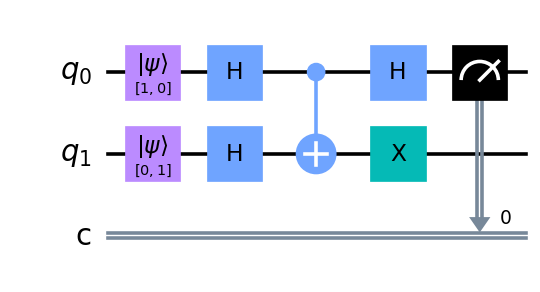

In [57]:
# CNOT gate.
circuit.cnot(0, 1)

# Apply x to second qubit.
circuit.x(1)

# Apply another Hadamard gate to the first qubit.
circuit.h(0)

# Measure the first qubit.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [58]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

# Show the result counts.
counts = results.get_counts()
counts

{'1': 1000}

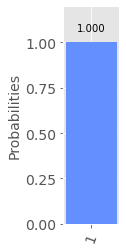

In [59]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

## **Now choose a random function**
***

In [60]:
# Return a random (part of) circuit - implementing the quantum oracle for f.
def random_f():
    # Create a circuit with 2 qubits, 1 classical bit.
    circuit = qiskit.QuantumCircuit(2, 1)
    
    # Pick one of the four functions at random.
    f_number = random.randint(1, 4)
    
    # 1: Constant 0 function. f(0) = f(1) = 0.
    # 2: Constant 1 function. f(0) = f(1) = 1.
    # 3: Balanced identity function. f(0) = 0, f(1) = 1.
    # 4: Balanced not function. f(0) = 1, f(1) = 0.
    
    if f_number == 1:
        # Apply Identity gate to second qubit.
        circuit.i(1)
    elif f_number == 2:
        # Apply Pauli x gate to second qubit.
        circuit.x(1)
    elif f_number == 3:
        # Apply CNOT gate to from first to second qubit.
        circuit.cnot(0, 1)
    elif f_number == 4:
        # Apply CNOT gate to from first to second qubit.
        circuit.cnot(0, 1)
        # Apply Pauli x gate to second qubit.
        circuit.x(1)
    else:
        print("Error!")
        
    # Return the circuit.
    return circuit

### Constructing the circuit
***

#### **First Part**

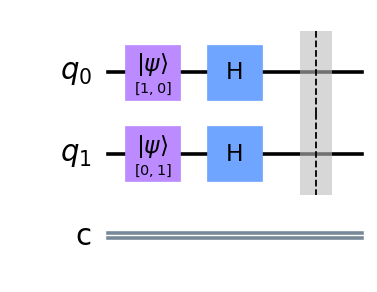

In [61]:
# Create a quantum circuit.
circuit = qiskit.QuantumCircuit(2, 1)

# Initialise the first qubit to |0>.
circuit.initialize([1, 0], 0)

# Initialise the second qubit to |1>.
circuit.initialize([0, 1], 1)

# Apply a Hadamard gate to each qubit.
circuit.h((0, 1))

# Separate parts of circuit.
circuit.barrier()

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

#### **Second Part**

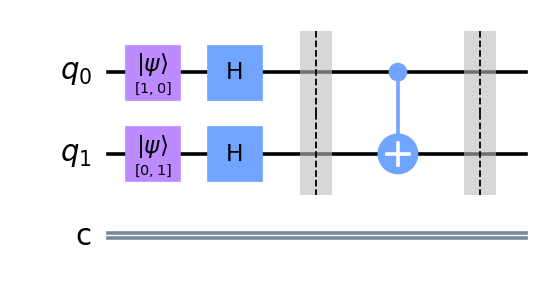

In [62]:
# Append the random_f() circuit to circuit.
circuit.compose(random_f(), inplace=True)

# Separate parts of circuit.
circuit.barrier()

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

#### **Third Part**

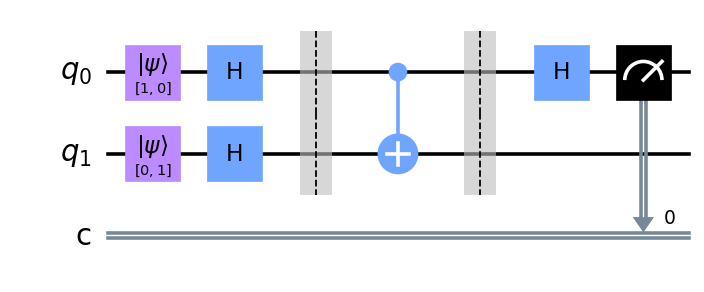

In [63]:
# Apply another Hadamard gate to the first qubit.
circuit.h(0)

# Measure the first qubit.
circuit.measure(0, 0)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.8)

In [64]:
# Create a simulation instance.
simulator = aer.QasmSimulator()

# Compile the circuit in the simluator.
compcircuit = qiskit.transpile(circuit, simulator)

# Simulate the circuit 1000 times.
job = simulator.run(compcircuit, shots=1000)

# Get the results.
results = job.result()

# Show the result counts.
counts = results.get_counts()
counts

{'1': 1000}

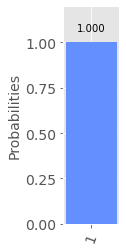

In [65]:
# Display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

# References
***

[1] Walker, K., 2022. How Quantum Computing Works. [online] Inverse.

Available at: <https://www.inverse.com/article/8966-how-quantum-computing-works> [Accessed 1 January 2022].

[2] Subramanian, R., 2022. 10 Differences between Classical computing and Quantum computing. [online] Medium. 

Available at: <https://rajprasathsubramanian89.medium.com/10-difference-between-classical-computing-and-quantum-computing-5e1777aa590d> [Accessed 1 January 2022].

[3] Deutsch, D., 2022. About Me – David Deutsch. [online] Daviddeutsch.org.uk. 

Available at: <https://www.daviddeutsch.org.uk/about-me/> [Accessed 1 January 2022].